 ###  <center>Аналитика токенов на блокчейне Waves</center>  
 
 Blockchain и в том числе Waves представляет собой отличный материал для различного рода анализа данных.
 Данная статья, представляет собой анализ токенов(assets) созданных на платформе <a href="https://wavesplatform.com">Waves</a> по некоторым их характеристикам.Результаты анализа представлены графически, с  пояснениями.<br> 
Информация о токенах Waves в текстовом виде представлена <a href="http://dev.pywaves.org/assets/">на странице</a> и формируется самим Waves.
 
**Общая логика получения и анализа данных:**
1. Материал для аналитики , получен путем парсингом блокчейна Waves,при обращении к  публичной ноде *nodes.wavesplatform.com.* Данные парсинга сохраняются в .json.
2. Информация извлекается из .json и необходимым образом преобразуется.
3. На основе полученного результата строятся графики и формируются комментарии.<br>
 
**Используемые технологии**:
 + язык разработки: Python.
 + среда разработки: <a href="https://jupyter.org/">Jupyter</a>.
 + отрисовка графиков: <a href="https://matplotlib.org/"> Matplotlib</a>.
 + <a href="http://nodes.wavesplatform.com/api-docs/index.html">Waves Full Node API</a>.
 + для парсинга блокчейна, частично использован код с репозитория <a href="https://github.com/PyWaves/pywavestools">PyWaves</a>(MIT license).
 
**Технические пояснения**:
+ в Jupyter notebook отображен только код который подготавливает и отображает данные. 
  Код для парсинга блокчена вынесен в отдельные .py файлы.
+ если Вы хотите свежий анализ данных, Вам необходимо перепарсить блокчейн и перезапустить ячейки Jupyter notebook.
+ проект на <a href="https://github.com/Ivanco21/Waves-assets-analytics">GitHub</a>.

**Необходимые пояснения**:
+ **смело пропускайте код,если Вам интресен только результат!**
+ данная статья не является ответом на вопрос "When Waves moon?" и ему подобных.
+ здесь представлена аналитика.Выводы из нее каждый делает для себя сам. 

**Пару слов о  токенах Waves**:
+ создать свой токен(ы) может любой участник сети Waves
+ выпуск (эммитирование) токена стоит 1 Waves.
+ выпуск токена очень прост, необходимо используя GUI кошелька ввести необходимые данные и в пару кликов выпустить свой токен. 


===================================================================================================================<br>
Итак начнем.<br>Первый график показывает рост числа токенов в промежуток от выпуска первого токена , до момента когда был произведен парсинг. 

In [1]:
import sys
temp = %pwd 
scriptsFolder = temp + '\scripts'
sys.path.append(scriptsFolder)
#sys.path

import os 
import json
import re
import time
import numpy as np
import requests
import jsonWorker as jw #help module for work with .json
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker

from datetime import datetime
from collections import Counter #sort array



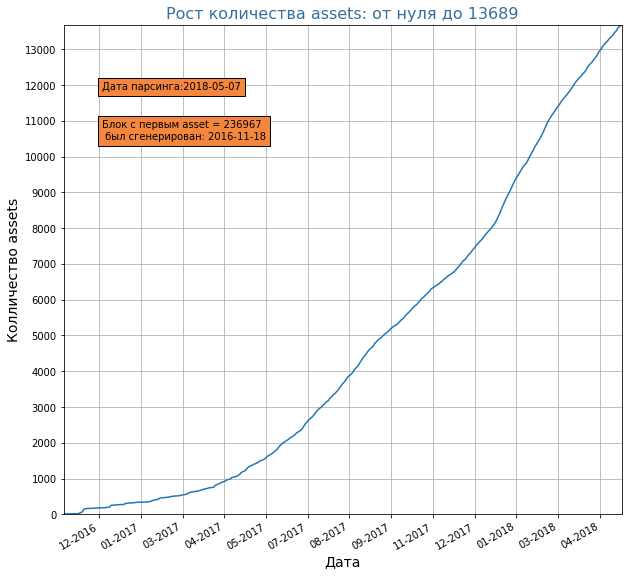

In [2]:
def formatCalendarDataAssetCount(information):
    dataProduse_countAssets = []
    assetCounter = 1
    infCount = 0

    for n in information:
        dataNotFormated = n['issue_time']
        tempData = datetime.strptime(dataNotFormated, "%m/%d/%Y %H:%M:%S")
        oneAssetData = datetime.date(tempData)

        if infCount > 0:
            previousDataNotFormated = information[infCount-1]['issue_time']
            previousTempData = datetime.strptime(previousDataNotFormated, "%m/%d/%Y %H:%M:%S")
            previousAssetData = datetime.date(previousTempData)
            #add one asset count to previos coint 
            if oneAssetData == previousAssetData:
                assetCounter += 1
                date_count = {
                        'date': previousAssetData,
                        'countAssets': assetCounter
                        }
                l = len(dataProduse_countAssets)
                dataProduse_countAssets.pop(l-1)
                dataProduse_countAssets.append(date_count)
                infCount += 1

            elif oneAssetData != previousAssetData:
                assetCounter += 1
                date_count = {
                        'date': oneAssetData,
                        'countAssets': assetCounter
                        }
                dataProduse_countAssets.append(date_count)
                infCount += 1
        #first asset     
        elif infCount == 0:
            date_count = {
                'date': oneAssetData,
                'countAssets': assetCounter
                 }
            dataProduse_countAssets.append(date_count)
            infCount += 1
            
    return dataProduse_countAssets

##########
information = jw.jsonRead(".\\parse_info\\assetsInfo.json")
information.reverse()            
dataProduse_countAssets = formatCalendarDataAssetCount(information)

allData = []
allCountInData = []
for i in dataProduse_countAssets:
    oneData = i['date']
    allData.append(oneData)
    oneCountInData = i['countAssets'] 
    allCountInData.append(oneCountInData)
#for interactive grafics
#%matplotlib notebook   
%matplotlib inline 

x = np.array(allData)
y = np.array(allCountInData)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot (1, 1, 1)

# X axis
datesToWrite = mdates.DateFormatter('%m-%Y')
ax.xaxis.set_major_formatter(datesToWrite)
locator_x = matplotlib.ticker.MaxNLocator(15)
ax.xaxis.set_major_locator(locator_x)
xMin = x[0]
xMax = x[len(x)-1]
ax.set_xlim([xMin,xMax])
# Y axis
locator_y = matplotlib.ticker.MultipleLocator(base=1000)
ax.yaxis.set_major_locator (locator_y)
yMax = y[len(y)-1]
ax.set_ylim(0,yMax)                                                     

plt.plot(x, y)
# Grafic comments 
maxAssetCount = str(y[len(y)-1] -1 )
plt.title("Рост количества assets: от нуля до " + maxAssetCount, fontsize = 16,color = '#3670a0')
plt.xlabel('Дата', fontsize = 14,color = 'black')
plt.ylabel('Колличество assets',fontsize = 14 ,color = 'black');
parsingData = str(x[len(x)-1])
dateCreatedFirstAset = str(x[0])
plt.text(x[20],y[len(y) - 50] , 'Дата парсинга:' + parsingData, bbox={"facecolor": "#f4863e"})
plt.text(x[20],y[len(y) - 80] , 'Блок с первым asset = 236967\n был сгенерирован: '
         + dateCreatedFirstAset, bbox={"facecolor": "#f4863e"})

fig.autofmt_xdate()
plt.grid(True)
plt.show()

===================================================================================================================<br>
Ок, мы выпустили токен(asset). Сколько Вы посчитали нужным сгенерировать токенов? Результаты можно увидеть ниже на графиках.

Интересный факт:
+ некоторые эммитенты, вероятно хотели очень много токенов, или просто тестировали блокчейн Waves и в результате получили 9223372036854775807 токенов, что является максимальным значением datatype-Long64 используемом в языке  Scala (Waves writen on Scala language).<br>
К примеру:http://dev.pywaves.org/assets/E1mrEVjwmBL9RbhvjwjWzr3cT2gcBNckSFpygZbZ1vNZ

Как показывает анализ, создатели хотят много токенов, очень много токенов)

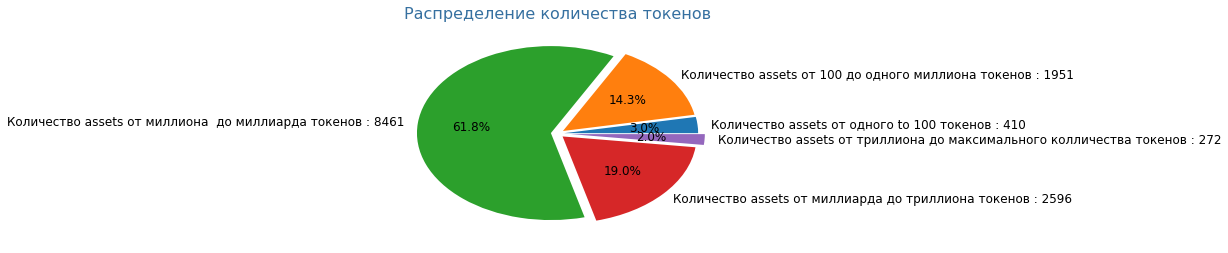

Некоторые значения:
1.Количество assets имеющих один токен: 159
2.Количество assets имеющих максимальное количество токенов: 6


In [3]:
%matplotlib inline

assetsINFO = jw.jsonRead('.\\parse_info\\assetsInfo.json')
assetsINFO.reverse()
allAssetsQuantity = jw.getOneTag(assetsINFO,'qt')#get Quantity tokens
allAssetsDecimals = jw.getOneTag(assetsINFO,'dec')#get Decimals tokens

astTokenBalance = []

#node REST API return not formated count tokens.Use token decimal for formating Quantity
for k,n in enumerate(allAssetsQuantity):
    tmp = n/10. ** allAssetsDecimals[k]
    astTokenBalance.append(tmp)

ast = np.array(astTokenBalance)
assetsSorted = np.sort(ast)
idx100 = np.nonzero(assetsSorted == 100)[0][0]
idx1000000 = np.nonzero(assetsSorted == 1000000)[0][0]
idx1000000000 = np.nonzero(assetsSorted == 1000000000)[0][0]
idx1000000000000 = np.nonzero(assetsSorted == 1000000000000)[0][0]

value = []
value.append(idx100)

cnt1000000_to_100 = idx1000000 - idx100 
value.append(cnt1000000_to_100)

cnt1000000000_to_1000000 = idx1000000000 - idx1000000
value.append(cnt1000000000_to_1000000)

cnt1000000000000_to_1000000000 = idx1000000000000 - idx1000000000
value.append(cnt1000000000000_to_1000000000)

cnt_End_to_1000000000000 = len(assetsSorted) - idx1000000000000
value.append(cnt_End_to_1000000000000)

labels = ('Количество assets от одного to 100 токенов : ' + str(idx100),
          'Количество assets от 100 до одного миллиона токенов : ' + str(cnt1000000_to_100),
          'Количество assets от миллиона  до миллиарда токенов : ' + str(cnt1000000000_to_1000000),
          'Количество assets от миллиарда до триллиона токенов : ' + str(cnt1000000000000_to_1000000000),
          'Количество assets от триллиона до максимального колличества токенов : ' + str(cnt_End_to_1000000000000)) 
          
explode = (0.05, 0.05, 0.05,0.05,0.1)
textprops = {'fontsize':12}
plt.title('Распределение количества токенов',fontsize = 16,color = '#3670a0')
plt.pie(value, labels=labels, autopct='%1.1f%%', shadow = False, explode = explode,radius = 1,textprops=textprops )
plt.show()

cntOneToken = len(np.nonzero(assetsSorted == 1)[0])
cntMaxValue = len(np.nonzero(assetsSorted == 9223372036854775807)[0])
print("Некоторые значения:")
print("1.Количество assets имеющих один токен: " + str(cntOneToken))
print("2.Количество assets имеющих максимальное количество токенов: " + str(cntMaxValue))

===================================================================================================================<br>
Следующей интересной характеристикой токена, является возможность перевыпуска(Reissuable). 
Возможны два варианта:
+ Reissuable = True: владелец  может изменить количеcтво токенов в дальнейшем.
+ Reissuable = False: владелец НЕ может изменить количеcтво токенов в дальнейшем.

Выбор распределился практически поровну:

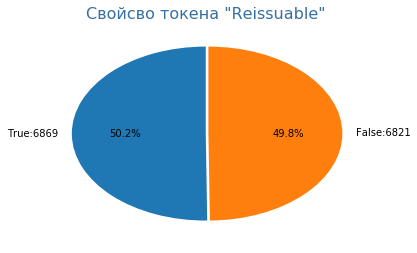

In [4]:
%matplotlib inline

assetsINFO = jw.jsonRead('.\\parse_info\\assetsInfo.json')
allAssetsReissuable = jw.getOneTag(assetsINFO,'reissuable')#get reissuable
trueCount = allAssetsReissuable.count(True)
falseCount = allAssetsReissuable.count(False)

value = []
value.append(trueCount)
value.append(falseCount)

labels = 'True:' + str(trueCount), 'False:' + str(falseCount)
explode = (0, 0.02)
plt.title('Свойсво токена "Reissuable"',fontsize = 16,color = '#3670a0')
plt.pie(value, labels=labels, autopct='%1.1f%%', shadow = False, explode = explode,radius = 1,startangle=90)

plt.show()

===================================================================================================================<br>
Для каждого токена, есть возможность добавить текстом описание токена, в нем можно указывать ссылки на какие либо ресурсы(URL).<br>
График ниже демонстриует использовали ли это создатели токенов:

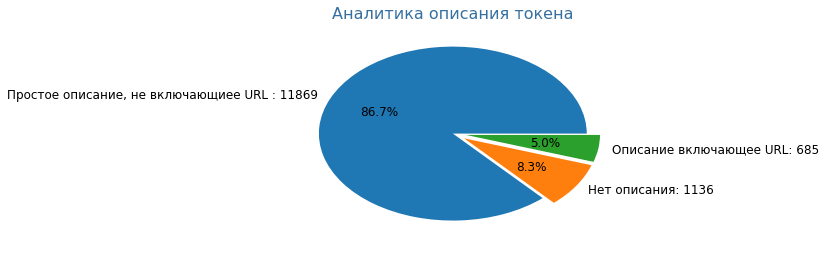

Для интереса:
1.Слово 'Bitcoin' встречается в описаниях - 532
2.Слово 'Ethereum' встречается в описаниях - 95
3.Слово 'Moon' встречается в описаниях - 65


In [8]:
%matplotlib inline

assetsINFO = jw.jsonRead('.\\parse_info\\assetsInfo.json')
allAssetsDescriptions = jw.getOneTag(assetsINFO,'description')#get description

notNullDescriptions = []
notNullDescriptions = list(filter(None, allAssetsDescriptions))
countNullDescriptions = len(allAssetsDescriptions) - len(notNullDescriptions)

countHTTPS_descriptions = 0
bitcoinWordCounter = 0
ethereumWordCounter = 0
moonWordCounter = 0
for i in notNullDescriptions:
    #simple search pattern
    # URL adress don't check "200" HTTP response status
    res = re.findall(r'(https?://\S+)', i)
    resBitcoin = re.findall('Bitcoin|bitcoin|BITCOIN', i)
    resEthereum = re.findall(r'Ethereum|ethereum|ETHEREUM', i)
    resMoon = re.findall(r'Moon|moon|MOON', i)
    if len(res) > 0:
        countHTTPS_descriptions += 1
    if len(resBitcoin) > 0:
        bitcoinWordCounter += len(resBitcoin)
    if len(resEthereum) > 0:
        ethereumWordCounter += len(resEthereum)
    if len(resMoon) > 0:
        moonWordCounter += len(resMoon)
        
        
        
value = []
notNullnotUrlDescriptions = len(allAssetsDescriptions) - countNullDescriptions - countHTTPS_descriptions
value.append(notNullnotUrlDescriptions) 
value.append(countNullDescriptions)
value.append(countHTTPS_descriptions)

labels = ('Простое описание, не включающиее URL : ' + str(notNullnotUrlDescriptions), 'Нет описания: ' + str(countNullDescriptions),
          'Описание включающее URL: ' + str(countHTTPS_descriptions)) 
          
explode = (0, 0.1, 0.1)
textprops = {'fontsize':12}
plt.title('Аналитика описания токена',fontsize = 16,color = '#3670a0')
plt.pie(value, labels=labels, autopct='%1.1f%%', shadow = False, explode = explode,radius = 1,textprops=textprops )
plt.show()


print("Для интереса:")
print("1.Слово 'Bitcoin' встречается в описаниях - " + str(bitcoinWordCounter))
print("2.Слово 'Ethereum' встречается в описаниях - " + str(ethereumWordCounter))
print("3.Слово 'Moon' встречается в описаниях - " + str(moonWordCounter))

===================================================================================================================<br>
Перейдем к Issuers (т.е. к тем кто выпустил токен).Один issuer может выпустить неограниченное количество токенов.
Таблица ниже показывает, сколько один issuer сгенерировал assets.

In [9]:
assetsINFO = jw.jsonRead('.\\parse_info\\assetsInfo.json')
allAssetsIssuers = jw.getOneTag(assetsINFO,'issuer')#get issuer

# issuer - how tokens creared issuer
issuer_count = Counter()
for issuer  in allAssetsIssuers:
    issuer_count[issuer] += 1
    
# count tokens - how many peoples created this count tokens   
cntTokens_countIssuers = Counter()    
for value in issuer_count.values():
    cntTokens_countIssuers[value] += 1

#converted to list
tempDictList = []
for key, value in cntTokens_countIssuers.items():
    tempDictList.append([key, value])
    
def getKey(item):
    return item[0]

# count tokens - how many peoples created this count tokens   
tokenPeople = sorted(tempDictList,key=getKey)  
   
from IPython.display import HTML, display

display(HTML(
    '<table><tr><caption><font size="4" color="#3670a0" face="Arial">Создатели assets</font></caption>'
    '<tr><th>Сколько assets выпустил один issuer</th><th>Количество issuer</th></tr>{}</tr></table>'.format(
        '</tr><tr>'.join('<td style="text-align:center">{}</td>'.format(
            '</td><td style="text-align:center">'.join(str(_) for _ in row)) for row in tokenPeople)
        )
 ))

===================================================================================================================<br>
Следующая интересная метрика, касательно issuer , это то сколько  tokens выпущенных issuer , сейчас у него на счету, в процентном соотношении. Однако, здесь следует очитывать следующий момент: количество токенов указанное в метрике - начальное. А как Вы знаете у токена есть свойство 'Reissuable' и у некоторых токенов соотношение выпущенные токены/токены у владельца, больше 100%. Т.е. владелец в процессе эксплуатации изменил количество токенов. Посмотрим как это выглядит графически.

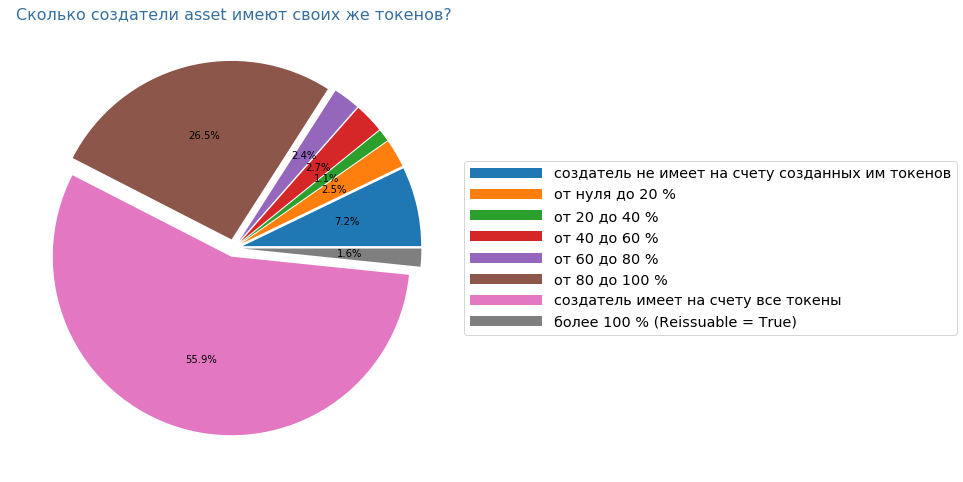

Всего проанализировано: 98.374.
Процент потерь: 1.626 - различные конвертации типов и представления чисел в Python.


In [13]:
%matplotlib inline

#node REST API return not formated count tokens.Use token decimal for formating Quantity
def decimalsConvertValue(value,decimals):
    convertedValues = []
    for k,n in enumerate(value):
        tmp = n/10. ** decimals[k]
        convertedValues.append(tmp)
    return convertedValues

balancesINFO = jw.jsonRead('.\\parse_info\\ownerBalanses.json')
assetsINFO = jw.jsonRead('.\\parse_info\\assetsInfo.json')
assetsINFO.reverse()

allOwnerBalances = jw.getOneTag(balancesINFO,'balance')#get balance
allAssetsDecimals = jw.getOneTag(assetsINFO,'dec')#get Decimals tokens
allQuantity = jw.getOneTag(assetsINFO,'qt')#get qt

ownBlns = decimalsConvertValue(allOwnerBalances,allAssetsDecimals)
quantity = decimalsConvertValue(allQuantity,allAssetsDecimals)

percent = []
#percent quantity tokens and  how tokens have issuer 
for nt,k in enumerate(ownBlns):
    # this method gives an error in the calculations
    tmpStr = format((k*100)/quantity[nt], '.3f')
    tmp = float(tmpStr)
    percent.append(tmp)
      
idx_0= [X for X in list(percent) if (X == 0)]
idx0_20 = [X for X in list(percent) if (X > 0 and X <= 20)]
idx20_40 = [X for X in list(percent) if (X > 20 and X <= 40)]
idx40_60 = [X for X in list(percent) if (X > 40 and X <= 60)]
idx60_80 = [X for X in list(percent) if (X > 60 and X <= 80)]
idx80_100 = [X for X in list(percent) if (X > 80 and X < 100)]
idx_100 = [X for X in list(percent) if (X == 100)]
idx_over_100 = [X for X in list(percent) if (X > 100)]#if token was increased

prcnt_0 = (len(idx_0*100))/len(percent)
prcnt0_20 = (len(idx0_20)*100)/len(percent)
prcnt20_40 = (len(idx20_40)*100)/len(percent)
prcnt40_60 = (len(idx40_60)*100)/len(percent)
prcnt60_80 = (len(idx60_80)*100)/len(percent)
prcnt80_100 = (len(idx80_100)*100)/len(percent)
prcnt_100 = (len(idx_100*100))/len(percent)
prcnt_over_100 = (len(idx_over_100*100))/len(percent)

fig, ax = plt.subplots(figsize=(8,12), subplot_kw=dict(aspect="equal"))
value = []
value.append(prcnt_0)
value.append(prcnt0_20)
value.append(prcnt20_40)
value.append(prcnt40_60)
value.append(prcnt60_80)
value.append(prcnt80_100)
value.append(prcnt_100)
value.append(prcnt_over_100)

comments = ['создатель не имеет на счету созданных им токенов',
            'от нуля до 20 %','от 20 до 40 %',
            'от 40 до 60 %','от 60 до 80 %',
            'от 80 до 100 %',
            'создатель имеет на счету все токены',
            'более 100 % (Reissuable = True)']

explode = (0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05,0.05)
plt.title('Сколько создатели asset имеют своих же токенов?',fontsize = 16,color = '#3670a0')
wedges, texts, autotexts = ax.pie(value, autopct='%1.1f%%',textprops=dict(color="black"),explode = explode)
ax.legend(wedges, comments,
          title= '',
          loc='center left',
          bbox_to_anchor=(1, 0, 1, 1),
          handlelength = 5,
          fontsize = 'x-large')

plt.show()
allpercent = format(prcnt_0+prcnt0_20+prcnt20_40+prcnt40_60+prcnt60_80+prcnt80_100+prcnt_100, '.3f')
messange = 'Всего проанализировано: ' + allpercent + '.'
lossPercent = format(100 - (prcnt_0+prcnt0_20+prcnt20_40+prcnt40_60+prcnt60_80+prcnt80_100+prcnt_100), '.3f')
messange2 = 'Процент потерь: ' + lossPercent +' - различные конвертации типов и представления чисел в Python.' 
print(messange)
print(messange2)

Мы рассмотрели все интресные(на мой взгляд) характрестики токенов, кроме одной. Любая экономика живет когда движется.
Несмотря на то, что есть Circulating (см. страницу токена на http://dev.pywaves.org/assets/ ), он не отображает сколько транзакций было с тем или иным токеном,
а лишь показывает состояние токена на текщий момент. Для подсчета количества транзакций, того или иного токена, необходимо парсить все транзакции блокчейна, с момента создания токена. Именно количество транзакций с участием какого то токена и является наиболее весомым показателем, работоспособности экономики токена.Естественно нужно учитывать, чтобы это были транзакции не только от владельца токена.
К сожалению это довольно много вычислений и времени, плюс вероятно нужно поднимать свою ноду, возможно я реализую это в будущем.<br>
На этом я завершаю обзор.

P.S. 
Сказать спасибо/поддержать автора можно на  Waves кошелек - **3PLG1KdKy7BGT5Y4JP65HJh7xd1ZVz3F4Qp**<br>
Если на данном кошельке наберется 100 Waves , я продолжу свою работу по аналитике блокчейна Waves(есть еще пару идей)а также, 20% от суммы пойдут на перевод статьи(ENG), 10% будут перечислены авторам наиболее полезных и интересных комментариев.<br>
В случае, если сумма не соберется, я сочту что Waves коммьюнити даннный материал не интересен, и вероятно займусь чем то другим.

Приветствуются комментарии:
+ по улучшению кода
+ по улучшению вывода графиков
+ идеи по аналитике Waves или иных блокчейнов

**Пожелания,предложения, связь с автором - ivansl.public@gmail.com**